In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.forecasting.theta import ThetaModel
import sklearn.metrics as skmetrics #For evaluation metrics

from prophet import Prophet

import warnings                               
warnings.filterwarnings('ignore')

/opt/homebrew/anaconda3/envs/linear_regession/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [121]:
df = pd.read_csv('./data/AEP_hourly.csv')
df['ds'] = pd.to_datetime(df['Datetime'])
df = df.sort_values(by='ds')
df['y'] = df['AEP_MW']
train = df[df['ds']<=pd.to_datetime('2015-12-31 23:59:59')]
test = df[df['ds']>pd.to_datetime('2015-12-31 23:59:59')]

In [122]:
train, len(train)

(                  Datetime   AEP_MW                  ds        y
 2183   2004-10-01 01:00:00  12379.0 2004-10-01 01:00:00  12379.0
 2184   2004-10-01 02:00:00  11935.0 2004-10-01 02:00:00  11935.0
 2185   2004-10-01 03:00:00  11692.0 2004-10-01 03:00:00  11692.0
 2186   2004-10-01 04:00:00  11597.0 2004-10-01 04:00:00  11597.0
 2187   2004-10-01 05:00:00  11681.0 2004-10-01 05:00:00  11681.0
 ...                    ...      ...                 ...      ...
 89852  2015-12-31 19:00:00  15360.0 2015-12-31 19:00:00  15360.0
 89853  2015-12-31 20:00:00  15030.0 2015-12-31 20:00:00  15030.0
 89854  2015-12-31 21:00:00  14642.0 2015-12-31 21:00:00  14642.0
 89855  2015-12-31 22:00:00  14212.0 2015-12-31 22:00:00  14212.0
 89856  2015-12-31 23:00:00  13843.0 2015-12-31 23:00:00  13843.0
 
 [98593 rows x 4 columns],
 98593)

In [123]:
test, len(test)

(                   Datetime   AEP_MW                  ds        y
 89857   2016-01-01 00:00:00  13487.0 2016-01-01 00:00:00  13487.0
 107354  2016-01-01 01:00:00  13135.0 2016-01-01 01:00:00  13135.0
 107355  2016-01-01 02:00:00  12912.0 2016-01-01 02:00:00  12912.0
 107356  2016-01-01 03:00:00  12685.0 2016-01-01 03:00:00  12685.0
 107357  2016-01-01 04:00:00  12631.0 2016-01-01 04:00:00  12631.0
 ...                     ...      ...                 ...      ...
 116157  2018-08-02 20:00:00  17673.0 2018-08-02 20:00:00  17673.0
 116158  2018-08-02 21:00:00  17303.0 2018-08-02 21:00:00  17303.0
 116159  2018-08-02 22:00:00  17001.0 2018-08-02 22:00:00  17001.0
 116160  2018-08-02 23:00:00  15964.0 2018-08-02 23:00:00  15964.0
 116161  2018-08-03 00:00:00  14809.0 2018-08-03 00:00:00  14809.0
 
 [22680 rows x 4 columns],
 22680)

In [124]:
#Prophet project
m = Prophet()

#Fit with default settings
m.fit(train)
#Fataframe with forecasting steps
future = m.make_future_dataframe(periods=len(test)+1, freq='H')
#Forecast
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

14:37:39 - cmdstanpy - INFO - Chain [1] start processing
14:37:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
121267,2018-08-02 20:00:00,16632.215734,6777.586829,27300.965377
121268,2018-08-02 21:00:00,16484.788142,6534.245510,27366.476779
121269,2018-08-02 22:00:00,15992.422408,6018.000567,26415.739606
121270,2018-08-02 23:00:00,15228.405544,5589.378262,26106.970432
121271,2018-08-03 00:00:00,14365.434594,4468.472845,24910.342092


In [125]:
forecast[['ds', 'yhat']].tail()

,ds,yhat
121267,2018-08-02 20:00:00,16632.215734
121268,2018-08-02 21:00:00,16484.788142
121269,2018-08-02 22:00:00,15992.422408
121270,2018-08-02 23:00:00,15228.405544
121271,2018-08-03 00:00:00,14365.434594


In [138]:
test[test['ds']==pd.to_datetime('2016-11-06 02:00:00')]
test_p = test.drop([99916,108724], axis=0)

In [139]:
predict = forecast[forecast['ds'].isin(test['ds'])]
np.sqrt(skmetrics.mean_squared_error(test_p['y'], predict['yhat']))

1938.1879935824197

In [135]:
#Prophet project
m = Prophet()
m.add_country_holidays(country_name='US')
#Fit with default settings
m.fit(train)
#Fataframe with forecasting steps
future = m.make_future_dataframe(periods=len(test)+1, freq='H')
#Forecast
forecast1 = m.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

14:39:14 - cmdstanpy - INFO - Chain [1] start processing
14:39:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
121267,2018-08-02 20:00:00,16655.162215,5706.255721,27089.344371
121268,2018-08-02 21:00:00,16506.586155,5642.457968,26581.606802
121269,2018-08-02 22:00:00,16013.006810,4936.067275,26391.236363
121270,2018-08-02 23:00:00,15247.698930,4777.912802,25658.764835
121271,2018-08-03 00:00:00,14383.351531,3170.948059,24865.025132


In [136]:
forecast1[['ds', 'yhat']].tail()

,ds,yhat
121267,2018-08-02 20:00:00,16655.162215
121268,2018-08-02 21:00:00,16506.586155
121269,2018-08-02 22:00:00,16013.006810
121270,2018-08-02 23:00:00,15247.698930
121271,2018-08-03 00:00:00,14383.351531


In [140]:
predict1 = forecast1[forecast['ds'].isin(test['ds'])]
np.sqrt(skmetrics.mean_squared_error(test_p['y'], predict1['yhat']))

1919.5994983633252

### Q2

In [12]:
ca = pd.read_csv('./data/zillow-carlifornia-1.csv')
ca['Date'] = pd.to_datetime(ca['Date'])
ca = ca.sort_values(by='Date')
ca = ca.dropna()
ca

,Date,MedianSoldPrice
0,2008-02-29,470000.0
1,2008-03-31,441000.0
2,2008-04-30,460000.0
3,2008-05-31,429000.0
4,2008-06-30,437500.0
...,...,...
90,2015-08-31,475000.0
91,2015-09-30,470000.0
92,2015-10-31,470000.0
93,2015-11-30,485750.0


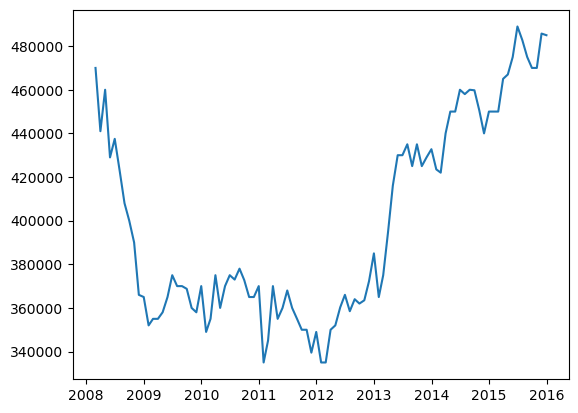

In [27]:
plt.plot(ca['Date'],ca['MedianSoldPrice'])

In [14]:
train = ca[:-12]
train

,Date,MedianSoldPrice
0,2008-02-29,470000.0
1,2008-03-31,441000.0
2,2008-04-30,460000.0
3,2008-05-31,429000.0
4,2008-06-30,437500.0
...,...,...
78,2014-08-31,460000.0
79,2014-09-30,459750.0
80,2014-10-31,450500.0
81,2014-11-30,440000.0


In [19]:
test = ca[-12:]
test

,Date,MedianSoldPrice
83,2015-01-31,450000.0
84,2015-02-28,450000.0
85,2015-03-31,465000.0
86,2015-04-30,467000.0
87,2015-05-31,475000.0
88,2015-06-30,489000.0
89,2015-07-31,482750.0
90,2015-08-31,475000.0
91,2015-09-30,470000.0
92,2015-10-31,470000.0


In [24]:
model_1 = ExponentialSmoothing(train['MedianSoldPrice'], trend="add", seasonal=None, damped_trend=False).fit()
pred_1 = pd.DataFrame(model_1.forecast(len(test)))
rmse = np.sqrt(skmetrics.mean_squared_error(test['MedianSoldPrice'], pred_1[0]))
print("ETS(trend='add', seasonal=None, damped_trend=False)")
print(f'RMSE: {rmse}')

ETS(train['MedianSoldPrice'], trend='add', seasonal=None, damped_trend=False)
RMSE: 20164.288531643368


In [25]:
model_1 = ExponentialSmoothing(train['MedianSoldPrice'], trend="add", seasonal=None, damped_trend=True).fit()
pred_1 = pd.DataFrame(model_1.forecast(len(test)))
rmse = np.sqrt(skmetrics.mean_squared_error(test['MedianSoldPrice'], pred_1[0]))
print("ETS(trend='add', seasonal=None, damped_trend=True)")
print(f'RMSE: {rmse}')

ETS(train['MedianSoldPrice'], trend='add', seasonal=None, damped_trend=True)
RMSE: 19785.090807667082


In [37]:
model_1 = ExponentialSmoothing(train['MedianSoldPrice'], trend="add", seasonal='add', seasonal_periods=12, damped_trend=False).fit()
pred_1 = pd.DataFrame(model_1.forecast(len(test)))
rmse = np.sqrt(skmetrics.mean_squared_error(test['MedianSoldPrice'], pred_1[0]))
print("ETS(trend='add', seasonal='add', seasonal_periods=12, damped_trend=False)")
print(f'RMSE: {rmse}')

ETS(trend='add', seasonal='add', seasonal_periods=12, damped_trend=False)
RMSE: 12642.49192309254


In [32]:
model_1 = ExponentialSmoothing(train['MedianSoldPrice'], trend="add", seasonal='add', seasonal_periods=12, damped_trend=True).fit()
pred_1 = pd.DataFrame(model_1.forecast(len(test)))
rmse = np.sqrt(skmetrics.mean_squared_error(test['MedianSoldPrice'], pred_1[0]))
print("ETS(trend='add', seasonal='add', seasonal_periods=12, damped_trend=True)")
print(f'RMSE: {rmse}')

ETS(trend='add', seasonal='add', seasonal_periods=12, damped_trend=True)
RMSE: 14254.814081436676


In [35]:
model_1 = ExponentialSmoothing(train['MedianSoldPrice'], trend="add", seasonal='mul', seasonal_periods=12, damped_trend=False).fit()
pred_1 = pd.DataFrame(model_1.forecast(len(test)))
rmse = np.sqrt(skmetrics.mean_squared_error(test['MedianSoldPrice'], pred_1[0]))
print("ETS(trend='add', seasonal='mul', seasonal_periods=12, damped_trend=False)")
print(f'RMSE: {rmse}')

ETS(trend='add', seasonal='mul', seasonal_periods=12, damped_trend=False)
RMSE: 12534.052899718252


In [33]:
model_1 = ExponentialSmoothing(train['MedianSoldPrice'], trend="add", seasonal='mul', seasonal_periods=12, damped_trend=True).fit()
pred_1 = pd.DataFrame(model_1.forecast(len(test)))
rmse = np.sqrt(skmetrics.mean_squared_error(test['MedianSoldPrice'], pred_1[0]))
print("ETS(trend='add', seasonal='mul', seasonal_periods=12, damped_trend=True)")
print(f'RMSE: {rmse}')

ETS(trend='add', seasonal='mul', seasonal_periods=12, damped_trend=True)
RMSE: 14262.164921436794


### Theta

In [66]:
model_4 = ThetaModel(train['MedianSoldPrice'], period=4, deseasonalize=True)
res = model_4.fit()
pred = res.forecast(len(test))
rmse = np.sqrt(skmetrics.mean_squared_error(test['MedianSoldPrice'], pred))
rmse, pred

(26436.21174613577,
 83    443141.151342
 84    445442.035588
 85    448042.446514
 86    450522.093078
 87    444337.822507
 88    446644.108600
 89    449250.721848
 90    451736.236920
 91    445534.493673
 92    447846.181611
 93    450458.997182
 94    452950.380762
 Name: forecast, dtype: float64)

In [58]:
model_5 = ThetaModel(train['MedianSoldPrice'], deseasonalize=False)
res = model_5.fit()
pred = res.forecast(len(test))
rmse = np.sqrt(skmetrics.mean_squared_error(test['MedianSoldPrice'], pred))
rmse, pred

(24166.566347427462,
 83    449182.635387
 84    449484.923809
 85    449787.212231
 86    450089.500653
 87    450391.789075
 88    450694.077497
 89    450996.365919
 90    451298.654341
 91    451600.942763
 92    451903.231185
 93    452205.519606
 94    452507.808028
 Name: forecast, dtype: float64)

### Graph

In [67]:
model_1 = ExponentialSmoothing(train['MedianSoldPrice'], trend="add", seasonal='mul', seasonal_periods=12, damped_trend=False).fit()
pred_ets = pd.DataFrame(model_1.forecast(len(test)))

In [68]:
model_5 = ThetaModel(train['MedianSoldPrice'], deseasonalize=False)
res = model_5.fit()
pred_theta = res.forecast(len(test))

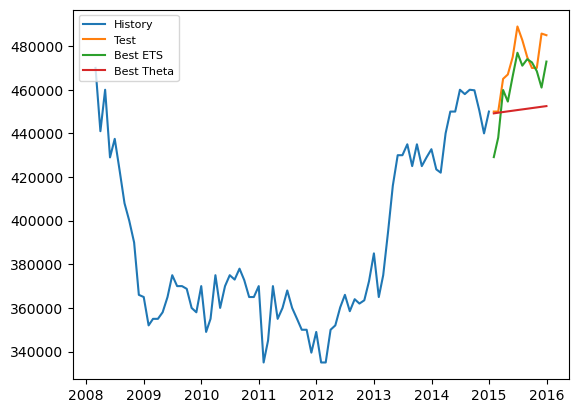

In [70]:
plt.plot(train['Date'], train['MedianSoldPrice'], label='History')
plt.plot(test['Date'], test['MedianSoldPrice'], label='Test')
plt.plot(test['Date'], pred_ets.values, label='Best ETS')
plt.plot(test['Date'], pred_theta, label='Best Theta')
plt.legend(loc='upper left', fontsize=8)
plt.show()